# Importing libraries and setting global variables

In [1]:
import pandas as pd
import numpy as np
import os
from joblib import dump, load

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor

In [2]:
ENV = "jn" #or jn for work on local machine

if ENV == "colab":
  DATA_PATH = "/content/drive/MyDrive/infa/elsefiles/"
elif ENV == "jn":
  DATA_PATH = "C:/Users/danil/Desktop/infa analog/datas"

In [3]:
#Function to print basic metrics
def stats(y_pred, y_test, log=False, rounded=None):
    result = {}
    if log:
        y_pred = np.expm1(y_pred)
        y_test = np.expm1(y_test)
    if rounded:
        y_pred = np.round(np.array(y_pred)/rounded, 1)*rounded
    result["MSE"] = mean_squared_error(y_pred, y_test)
    result["MAE"] = mean_absolute_error(y_pred, y_test)
    result["MAPE"] = mean_absolute_percentage_error(y_pred, y_test)
    result["RMSE"] = root_mean_squared_error(y_pred, y_test)
    result["R2"] = r2_score(y_pred, y_test)
    return pd.Series(result)

In [114]:
def print_obj(i):
  return df_test.loc[i, :][df_test.loc[i, :] > 0]

# Import and preparing data

In [4]:
df = pd.read_csv(os.path.join(DATA_PATH, "autos_df.csv"))

In [5]:
df.shape

(377849, 974)

In [6]:
df.head()

,engine_v,engine_power,km,price,year,salon,on order,verified dealler,population,История авто бесплатно,...,region:Тюменская область,region:Удмуртская Республика,region:Ульяновская область,region:Хабаровский край,region:Хакасия,region:Ханты-Мансийский автономный округ — Югра,region:Челябинская область,region:Чувашская Республика,region:Ямало-Ненецкий автономный округ,region:Ярославская область
0,3.0,340.0,230000,3390000.0,2014,0,0,0,1318604.0,1,...,0,0,0,0,0,0,0,0,0,0
1,3.0,333.0,160500,3550000.0,2016,0,0,0,13149803.0,1,...,0,0,0,0,0,0,0,0,0,0
2,1.7,80.0,170000,450000.0,2011,0,0,0,68349.0,1,...,0,0,0,0,0,0,0,0,0,0
3,1.5,147.0,0,1905330.0,2024,0,0,0,13149803.0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.8,367.0,78000,2299990.0,2008,0,0,0,1177058.0,0,...,0,0,0,0,0,0,1,0,0,0


In [7]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=["log_price", "price"]), df["price"], test_size=0.3, random_state=42)

# Baseline model - Linear Regression and data preparation with ML

In [8]:
l_model = LinearRegression()
l_model.fit(X_train, y_train)
y_pred = l_model.predict(X_test)

In [9]:
stats(y_pred, y_test, log=False)

MSE     3.532863e+12
MAE     8.540493e+05
MAPE    3.409075e+00
RMSE    1.879591e+06
R2      6.141563e-01
dtype: float64

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=["log_price", "price"]), df["log_price"], test_size=0.3, random_state=42)

In [11]:
l_model = LinearRegression()
l_model.fit(X_train, y_train)
y_pred = l_model.predict(X_test)

In [12]:
stats(y_pred, y_test, log=True)

MSE     2.264972e+12
MAE     4.314759e+05
MAPE    1.761609e-01
RMSE    1.504982e+06
R2      7.178265e-01
dtype: float64

Better to log price

________________________________________________________________________________________________________________________________________________________

In [125]:
#Save linear model
#dump(l_model, "linear_model.joblib")

['linear_model.joblib']

In [126]:
#Importing linear model
#l_model = load("linear_model.joblib")

________________________________________________________________________________________________________________________________________________________

In [14]:
#There are few numeric features that could be replaced by log. Let's learn best combination
df1 = df.copy()
for combination in ["000", "001", "010", "011", "100", "101", "110", "111"]:
    if combination[0] == "1":
       df1["km"] = df["km"].apply(np.log1p)
    else:
        df1["km"] = df["km"]
    if combination[1] == "1":
       df1["engine_v"] = df["engine_v"].apply(np.log1p)
    else:
        df1["engine_v"] = df["engine_v"]
    if combination[2] == "1":
       df1["engine_power"] = df["engine_power"].apply(np.log1p)
    else:
        df1["engine_power"] = df["engine_power"]

    X_train, X_test, y_train, y_test = train_test_split(df1.drop(columns=["log_price", "price"]), df["log_price"], test_size=0.3, random_state=42)
    l_model = LinearRegression()
    l_model.fit(X_train, y_train)
    y_pred = l_model.predict(X_test)
    print("_________________________________")
    print(combination)
    print(stats(y_pred, y_test, log=True))

_________________________________
000
MSE     2.264972e+12
MAE     4.314759e+05
MAPE    1.761609e-01
RMSE    1.504982e+06
R2      7.178265e-01
dtype: float64
_________________________________
001
MSE     2.441335e+12
MAE     4.405422e+05
MAPE    1.768174e-01
RMSE    1.562477e+06
R2      6.790716e-01
dtype: float64
_________________________________
010
MSE     2.282307e+12
MAE     4.317242e+05
MAPE    1.756837e-01
RMSE    1.510730e+06
R2      7.134705e-01
dtype: float64
_________________________________
011
MSE     2.443971e+12
MAE     4.402932e+05
MAPE    1.765375e-01
RMSE    1.563321e+06
R2      6.783195e-01
dtype: float64
_________________________________
100
MSE     2.239277e+12
MAE     4.402879e+05
MAPE    1.888674e-01
RMSE    1.496421e+06
R2      7.468217e-01
dtype: float64
_________________________________
101
MSE     2.368444e+12
MAE     4.477852e+05
MAPE    1.889846e-01
RMSE    1.538975e+06
R2      7.193965e-01
dtype: float64
_________________________________
110
MSE     2.2490

Combination 100 is the best.
Logariphm of price increases results of Linear Regressor(R^2 4,04%, but MAE also increases +2,04%). Let's replace km with log_km 

In [15]:
df["km"] = df["km"].apply(np.log1p)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=["log_price", "price"]), df["log_price"], test_size=0.3, random_state=42)

Simple linear regressor on log_price and with replacing km by logariphm ha R^2 0.747 and MAE 440 000 - not a bad result for baseline model

________________________________________________________________________________________________________________________________________________________

In the dataset were outliers on price. Let's see what if we will train on limited on price dataset.

In [164]:
price_limit = 35_000_000
X_train_pl, X_test_pl, y_train_pl, y_test_pl = train_test_split(df[df["price"]<=price_limit].drop(columns=["log_price", "price"]), df[df["price"]<=price_limit]["log_price"], test_size=0.3, random_state=42)

In [159]:
l_model_pl = LinearRegression()
l_model_pl.fit(X_train, y_train)
y_pred = l_model_pl.predict(X_test)

In [160]:
stats(y_pred, y_test, log=True)

MSE     1.122789e+12
MAE     4.285857e+05
MAPE    1.652210e-01
RMSE    1.059618e+06
R2      8.656437e-01
dtype: float64

In [161]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=["log_price", "price"]), df["log_price"], test_size=0.3, random_state=42)

In [162]:
y_pred = l_model_pl.predict(X_test)
stats(y_pred, y_test, log=True)

MSE     2.254398e+12
MAE     4.411888e+05
MAPE    1.859017e-01
RMSE    1.501465e+06
R2      7.389115e-01
dtype: float64

R^2 increases a litle bit, MAE increases too. For now let's keep training models on the initial dataset

________________________________________________________________________________________________________________________________________________________

# Baseline model - Random Forrest Regressor

In [17]:
#building standard RandomForest as baseline
model = RandomForestRegressor(random_state=42, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)
#or importing
#model = load("baseline_rfr1.joblib")

y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   30.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.5min finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.6s finished


In [18]:
stats(y_pred, y_test, log=True)

MSE     1.401275e+12
MAE     2.511726e+05
MAPE    1.070229e-01
RMSE    1.183755e+06
R2      8.693905e-01
dtype: float64

R^2 is 86,94% and MAPE 10,702% - good result for baseline. Let's try to improve it

TODO: learn on MAE 

In [ ]:
#Saving model
#dump(model, "baseline_rfr1.joblib")

In [19]:
#Let's see criterion MAE
#model = RandomForestRegressor(random_state=42, n_jobs=-1, verbose=3, criterion="absolute_error")
#model.fit(X_train, y_train)
#y_pred = model.predict(X_test)

In [20]:
#stats(y_pred, y_test, log=True)

____________________________________________________________________________________________________________________________

In [165]:
model11 = RandomForestRegressor(random_state=42, n_jobs=-1, verbose=1)
model11.fit(X_train_pl, y_train_pl)
#or importing
#model = load("baseline_rfr1.joblib")

y_pred = model11.predict(X_test)
stats(y_pred, y_test, log=True)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   29.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.5min finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.6s finished


MSE     1.313419e+12
MAE     1.580992e+05
MAPE    6.229461e-02
RMSE    1.146045e+06
R2      8.741854e-01
dtype: float64

Limiting dataset in case of Random Forest improving results even better than in case of Linear Regression

## Feature comparison with white noise

In [21]:
#We'll create feature w_n being just meaningless white noise and we'll compare input of w_n with others features
df["w_n"] = np.random.normal(0, 1, size=len(df))
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=["log_price", "price"]), df["log_price"], test_size=0.3, random_state=42)

In [22]:
model = RandomForestRegressor(random_state=42, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   31.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.5min finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.6s finished


In [23]:
stats(y_pred, y_test, log=True)

MSE     1.426910e+12
MAE     2.589396e+05
MAPE    1.093983e-01
RMSE    1.194533e+06
R2      8.664086e-01
dtype: float64

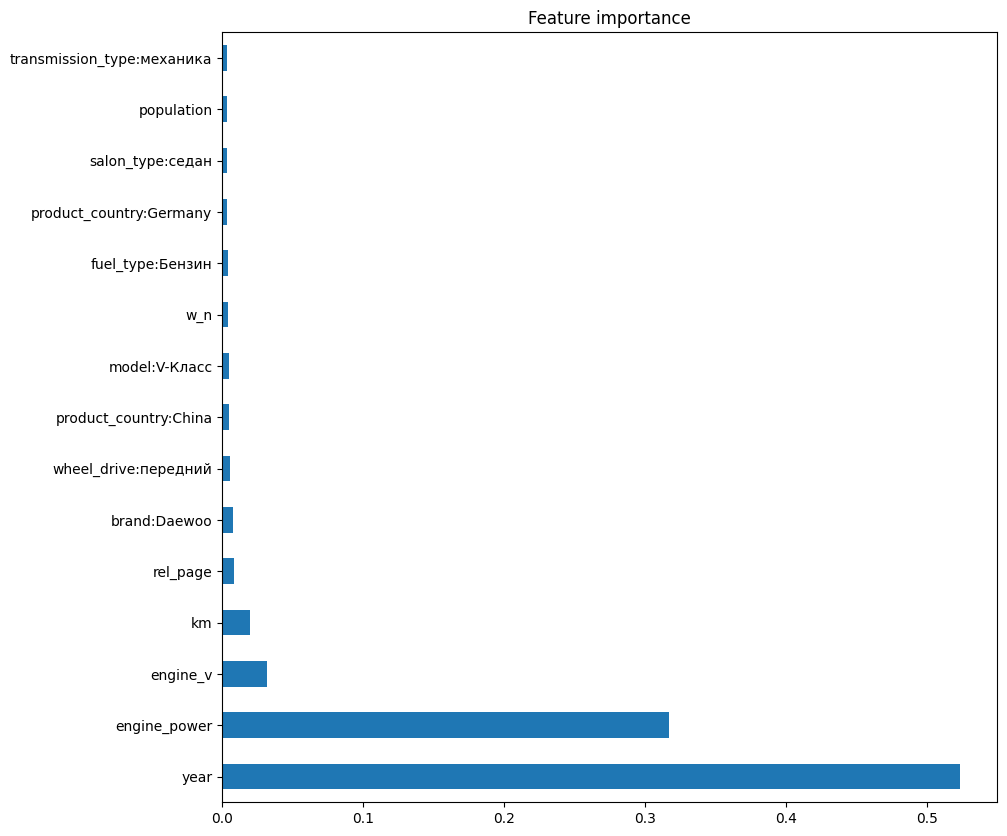

In [24]:
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.title("Feature importance")
plt.show()

White noise is on 10th place. So theoraticly 962(972-10) features are unsignificant and we could drop them. By the way we won't do this and just will try to search optimal model and hyperparametres

In [25]:
X_train.shape

(264494, 973)

In [26]:
#Deleting white noise out of everywhere
df = df.drop(columns=["w_n"])
X_train = X_train.drop(columns=["w_n"])
X_test = X_test.drop(columns=["w_n"])

## Random Forest Regressor on only BWM

In [27]:
X_bmw_train, X_bmw_test, y_bmw_train, y_bmw_test = train_test_split(df[df["brand:BMW"]==1].drop(columns=["log_price", "price"]), df[df["brand:BMW"]==1]["log_price"], test_size=0.3)

In [28]:
X_bmw_train.shape, X_bmw_test.shape

((13328, 972), (5712, 972))

In [29]:
model = RandomForestRegressor(random_state=42, n_jobs=-1, verbose=1)
model.fit(X_bmw_train, y_bmw_train)
y_bmw_pred = model.predict(X_bmw_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


In [30]:
stats(y_bmw_pred, y_bmw_test, log=True)

MSE     8.563830e+11
MAE     5.089957e+05
MAPE    1.082629e-01
RMSE    9.254097e+05
R2      9.627692e-01
dtype: float64

## Random Forest Regressor on only Kia

In [31]:
X_kia_train, X_kia_test, y_kia_train, y_kia_test = train_test_split(df[df["brand:Kia"]==1].drop(columns=["log_price", "price"]), df[df["brand:Kia"]==1]["log_price"], test_size=0.3)

In [32]:
X_kia_train.shape, X_kia_test.shape

((13645, 972), (5849, 972))

In [33]:
model = RandomForestRegressor(random_state=42, n_jobs=-1, verbose=1)
model.fit(X_kia_train, y_kia_train)
y_bmw_pred = model.predict(X_kia_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


In [34]:
stats(y_bmw_pred, y_kia_test, log=True)

MSE     7.719254e+10
MAE     1.690767e+05
MAPE    9.149052e-02
RMSE    2.778355e+05
R2      9.515852e-01
dtype: float64

<Axes: >

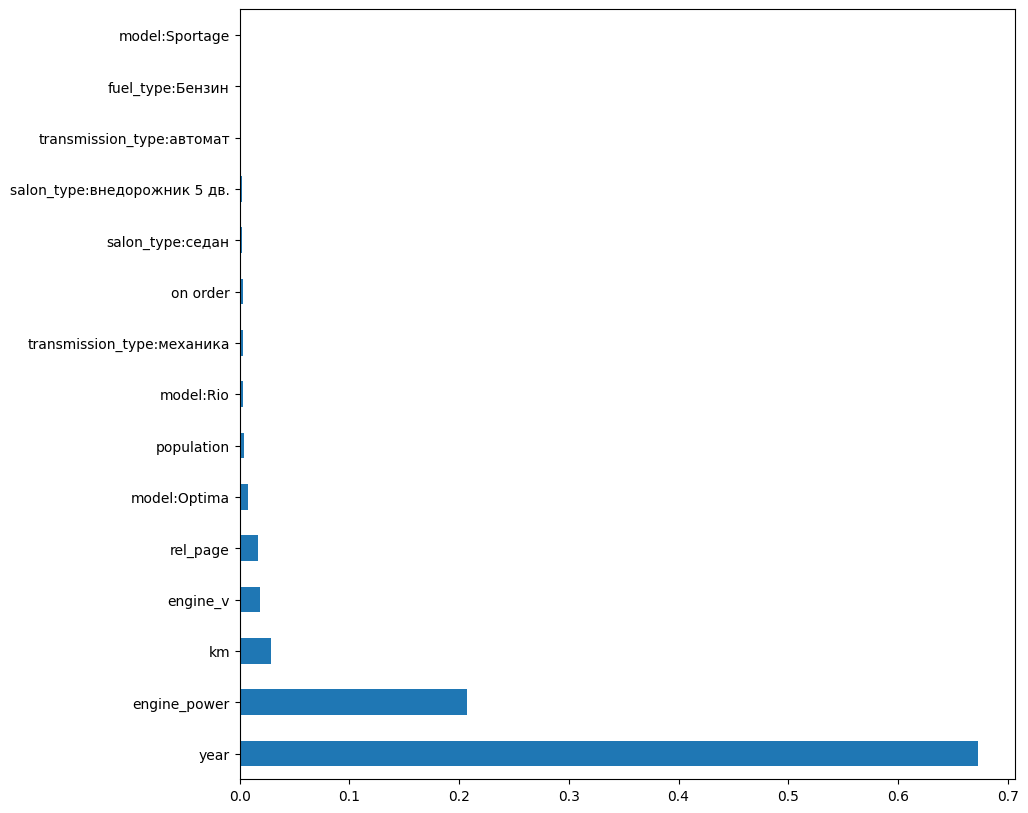

In [35]:
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(15).plot(kind='barh')

R^2 if standard Random forest been trained on filtered dataset on one brand increases by 10% points. MAPE also improves. Maybe better to have several models for each brand? For now let's concentrate on one model or stacking

# Different models

## Extra Trees Regressor

In [ ]:
#Import
#etr = load("etr.joblib")

In [36]:
etr = ExtraTreesRegressor(random_state=42, n_jobs=-1, verbose=1)
etr.fit(X_train, y_train)
y_pred = etr.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.2min finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.7s finished


In [ ]:
#Saving
#dump(etr, "etr.joblib")

In [37]:
stats(y_pred, y_test, log=True)

MSE     1.424359e+12
MAE     2.392934e+05
MAPE    1.037753e-01
RMSE    1.193465e+06
R2      8.690958e-01
dtype: float64

This model is almost the same as baseline. MAPE decreases by 0.0032% ceteris paribus.

## Grasdient Boosting

In [38]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
#Import
#gbr = load("gbr.joblib")

In [39]:
gbr = GradientBoostingRegressor(n_estimators=250, verbose=1)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)

      Iter       Train Loss   Remaining Time 
         1           0.7057            8.28m
         2           0.6066            8.29m
         3           0.5255            8.28m
         4           0.4583            8.25m
         5           0.4033            8.21m
         6           0.3565            8.18m
         7           0.3165            8.14m
         8           0.2837            8.10m
         9           0.2553            8.06m
        10           0.2326            8.02m
        20           0.1218            7.68m
        30           0.0893            7.36m
        40           0.0756            7.00m
        50           0.0682            6.60m
        60           0.0637            6.24m
        70           0.0607            5.89m
        80           0.0587            5.52m
        90           0.0569            5.17m
       100           0.0558            4.82m
       200           0.0482            1.57m


In [ ]:
#Save
#dump(gbr, "gbr.joblib")

In [40]:
stats(y_pred, y_test, log=True)

MSE     1.963091e+12
MAE     4.237007e+05
MAPE    1.626764e-01
RMSE    1.401104e+06
R2      8.030813e-01
dtype: float64

Gradient Boosting here is worse then Random Forest or ExtraTrees

## Bagging on Random Forest

In [41]:
from sklearn.ensemble import BaggingRegressor

In [42]:
model = RandomForestRegressor(random_state=42, n_jobs=-1, verbose=1)

In [43]:
bgr = BaggingRegressor(model, n_estimators=3, n_jobs=-1, random_state=42, verbose=1)
bgr.fit(X_train, y_train)
y_pred = bgr.predict(X_test)

[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:  3.1min finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    6.1s finished


In [44]:
stats(y_pred, y_test, log=True)

MSE     1.424734e+12
MAE     2.573758e+05
MAPE    1.090285e-01
RMSE    1.193622e+06
R2      8.651347e-01
dtype: float64

## Stacking - Random Forest Regressor and Bagging on Extra Trees

In [45]:
from tqdm import tqdm

In [ ]:
#Import
#models = [load("stacking1_rfr.joblib"), load("stacking1_bag75.joblib")]

In [46]:
models = [RandomForestRegressor(random_state=42, n_jobs=-1, verbose=1),
         BaggingRegressor(ExtraTreesRegressor(n_estimators=75, random_state=42, verbose=1), random_state=42, n_jobs=-2, verbose=1)]

def stacking_model_predict(d_models, d_X_train, d_y_train, d_X_test):
    d_df = pd.DataFrame()
    for model_ in tqdm(d_models):
        model_.fit(d_X_train, d_y_train)
        y_pred = model_.predict(d_X_test)
        d_df[str(model_)[:6]] = y_pred
    return d_df

tmp_df =  stacking_model_predict(models, X_train, y_train, X_test)
tmp_df["y_pred"] = tmp_df.mean(axis=1)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.                | 0/2 [00:00<?, ?it/s]
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   31.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.5min finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.             | 1/2 [01:31<01:31, 91.73s/it]
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed: 17.1min remaining: 68.5min
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed: 17.5min finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:   10.4s remaining:   41.8s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:   21.5s finished
100%|██████████████████████████

In [ ]:
#Save
#dump(models[0], "stacking1_rfr.joblib")
#dump(models[1], "stacking1_bag75.joblib")

In [47]:
tmp_df.head()

,Random,Baggin,y_pred
0,15.767702,15.928846,15.848274
1,13.160859,13.191644,13.176252
2,14.308945,14.298496,14.303721
3,13.159441,13.217542,13.188491
4,12.059945,12.013872,12.036908


In [48]:
stats(tmp_df["y_pred"], y_test, log=True)

MSE     1.377345e+12
MAE     2.396915e+05
MAPE    1.029857e-01
RMSE    1.173603e+06
R2      8.708571e-01
dtype: float64

In [49]:
stats(tmp_df["Random"], y_test, log=True)

MSE     1.401275e+12
MAE     2.511726e+05
MAPE    1.070229e-01
RMSE    1.183755e+06
R2      8.693905e-01
dtype: float64

In [50]:
stats(tmp_df["Baggin"], y_test, log=True)

MSE     1.387106e+12
MAE     2.385746e+05
MAPE    1.032936e-01
RMSE    1.177755e+06
R2      8.699096e-01
dtype: float64

In [ ]:
#Import
#models = [load("stacking1_rfr1.joblib"), load("stacking1_bag1.joblib")]

In [53]:
models = [RandomForestRegressor(random_state=42, n_jobs=-1, verbose=1),
         BaggingRegressor(ExtraTreesRegressor(random_state=42, verbose=1), random_state=42, verbose=1, n_jobs=-4)]

def stacking_model_predict(d_models, d_X_train, d_y_train, d_X_test):
    d_df = pd.DataFrame()
    for model_ in tqdm(d_models):
        model_.fit(d_X_train, d_y_train)
        y_pred = model_.predict(d_X_test)
        d_df[str(model_)[:6]] = y_pred
    return d_df

tmp_df1 =  stacking_model_predict(models, X_train, y_train, X_test)
tmp_df1["y_pred"] = tmp_df1.mean(axis=1)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.                | 0/2 [00:00<?, ?it/s]
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   30.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.5min finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.               | 1/2 [01:32<01:32, 92.69s/it]
[Parallel(n_jobs=9)]: Done   2 out of   9 | elapsed: 20.9min remaining: 73.2min
[Parallel(n_jobs=9)]: Done   9 out of   9 | elapsed: 33.0min finished
[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done   2 out of   9 | elapsed:   22.3s remaining:  1.3min
[Parallel(n_jobs=9)]: Done   9 out of   9 | elapsed:   45.9s finished
100%|████████████████████████████████

In [128]:
#Save
dump(models[0], "stacking1_rfr1.joblib")
dump(models[1], "stacking1_bag1.joblib")

['stacking1_bag1.joblib']

In [58]:
stats(tmp_df1["y_pred"], y_test, log=True)

MSE     1.377912e+12
MAE     2.397031e+05
MAPE    1.029911e-01
RMSE    1.173845e+06
R2      8.708000e-01
dtype: float64

In [59]:
stats(tmp_df1["y_pred"], y_test, log=True, rounded=100)

MSE     1.377912e+12
MAE     2.397031e+05
MAPE    1.029911e-01
RMSE    1.173845e+06
R2      8.708000e-01
dtype: float64

In [63]:
stats(tmp_df1["y_pred"], y_test, log=True, rounded=100_000)

MSE     1.377943e+12
MAE     2.397718e+05
MAPE    1.030084e-01
RMSE    1.173858e+06
R2      8.707962e-01
dtype: float64

# Where does model make mistakes?

In [64]:
y_pred = tmp_df["y_pred"]

In [65]:
df_test = X_test.copy()

In [66]:
df_test["y_test"] = np.expm1(y_test).astype(np.int64)
df_test["y_pred"] = np.expm1(np.array(tmp_df["y_pred"])).astype(np.int64)
df_test["MAPE"] = np.round(np.abs((df_test["y_test"] - df_test["y_pred"])/df_test["y_test"])*100, 3)
df_test.head()

,engine_v,engine_power,km,year,salon,on order,verified dealler,population,История авто бесплатно,Без пробега по РФ,...,region:Хабаровский край,region:Хакасия,region:Ханты-Мансийский автономный округ — Югра,region:Челябинская область,region:Чувашская Республика,region:Ямало-Ненецкий автономный округ,region:Ярославская область,y_test,y_pred,MAPE
357434,3.0,340.0,3.258097,2022,0,1,0,615570.0,0,0,...,1,0,0,0,0,0,0,7649999,7635155,0.194
63339,1.6,115.0,12.180760,2008,0,0,0,30194.0,1,0,...,0,0,0,0,0,0,0,449999,527682,17.263
170243,1.6,204.0,10.425283,2021,0,1,0,591628.0,0,0,...,0,0,0,0,0,0,0,1550000,1629396,5.122
345729,1.8,170.0,12.728259,2001,0,0,0,1536183.0,1,0,...,0,0,0,0,0,0,0,405000,534180,31.896
214972,1.8,88.0,12.765691,1987,0,0,0,13149803.0,1,0,...,0,0,0,0,0,0,0,170000,168873,0.663


In [67]:
df_test["MAPE"].describe()

count    113355.000000
mean         10.104506
std          15.333725
min           0.000000
25%           2.099000
50%           6.198000
75%          13.168500
max        1871.958000
Name: MAPE, dtype: float64

<Axes: xlabel='MAPE', ylabel='Count'>

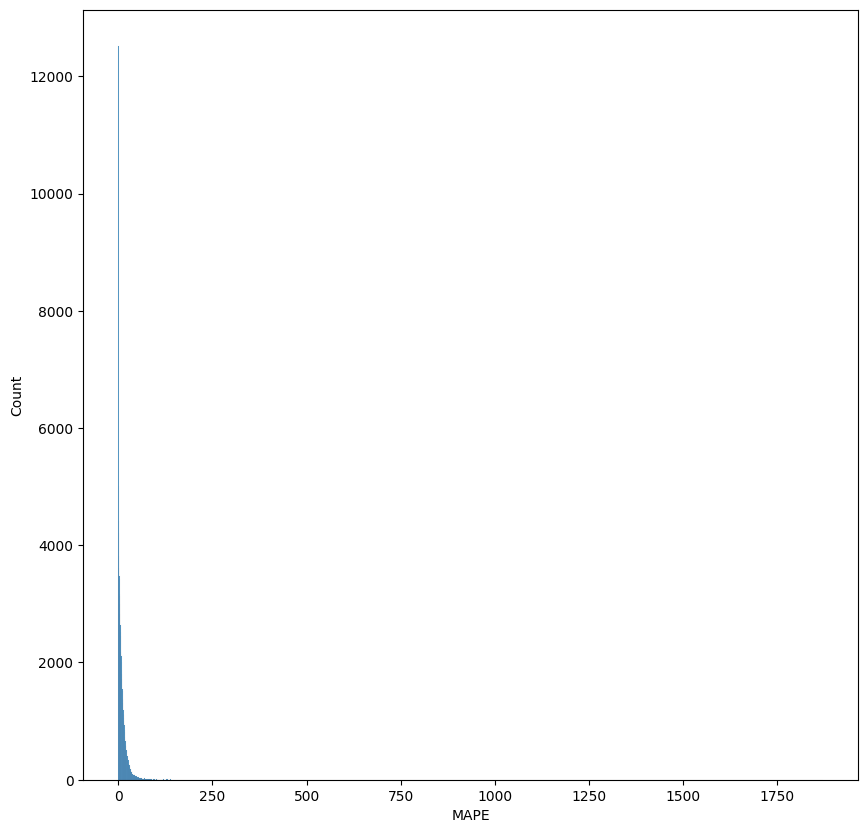

In [70]:
sns.histplot(df_test["MAPE"])

<Axes: xlabel='y_test', ylabel='MAPE'>

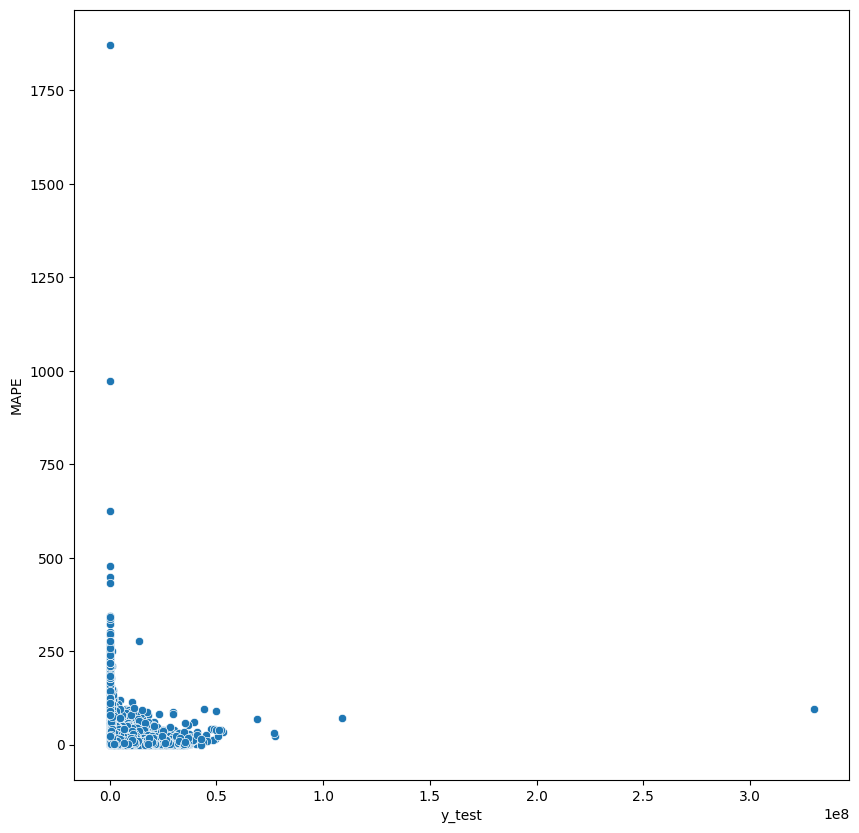

In [123]:
sns.scatterplot(data=df_test, x="y_test", y="MAPE")

In [88]:
round(df_test[df_test["MAPE"] >= 100].shape[0]/df_test.shape[0]*100, 2)

0.28

In [1]:
df_test[df_test["MAPE"] >= 100].sort_values(by="MAPE", ascending=False).head(10)

NameError: name 'df_test' is not defined

In [115]:
print_obj(149281)

engine_v                        5.200000e+00
engine_power                    2.110000e+02
km                              9.903538e+00
year                            1.996000e+03
population                      1.314980e+07
История авто бесплатно          1.000000e+00
num_tags                        1.000000e+00
rel_page                        4.814815e-01
fuel_type:Бензин                1.000000e+00
transmission_type:автомат       1.000000e+00
salon_type:внедорожник 5 дв.    1.000000e+00
wheel_drive:полный              1.000000e+00
color:чёрный                    1.000000e+00
model:Grand Cherokee            1.000000e+00
brand:Jeep                      1.000000e+00
product_country:USA             1.000000e+00
region:Москва                   1.000000e+00
y_test                          1.999990e+05
y_pred                          3.943896e+06
MAPE                            1.871958e+03
Name: 149281, dtype: float64

In [116]:
print_obj(374737)

engine_v                     5.400000e+00
engine_power                 3.260000e+02
km                           1.151294e+01
year                         1.997000e+03
population                   1.314980e+07
История авто бесплатно       1.000000e+00
num_tags                     1.000000e+00
rel_page                     4.186047e-01
fuel_type:Бензин             1.000000e+00
transmission_type:автомат    1.000000e+00
salon_type:седан             1.000000e+00
color:чёрный                 1.000000e+00
model:7 серии                1.000000e+00
brand:BMW                    1.000000e+00
product_country:Germany      1.000000e+00
region:Москва                1.000000e+00
y_test                       2.199990e+05
y_pred                       2.358105e+06
MAPE                         9.718710e+02
Name: 374737, dtype: float64

In [117]:
print_obj(299391)

engine_v                            2.000000
engine_power                       88.000000
km                                 10.819798
year                             1994.000000
population                      17985.000000
История авто бесплатно              1.000000
num_tags                            1.000000
rel_page                            0.750000
fuel_type:Дизель                    1.000000
transmission_type:автомат           1.000000
salon_type:компактвэн               1.000000
wheel_drive:полный                  1.000000
color:синий                         1.000000
model:RVR                           1.000000
brand:Mitsubishi                    1.000000
product_country:Japan               1.000000
region:Свердловская область         1.000000
y_test                          50000.000000
y_pred                         274709.000000
MAPE                              449.418000
Name: 299391, dtype: float64

In [118]:
print_obj(303208)

engine_v                           1.800000
engine_power                     125.000000
km                                12.936036
year                            2002.000000
population                    266681.000000
История авто бесплатно             1.000000
num_tags                           1.000000
rel_page                           0.368421
fuel_type:Бензин                   1.000000
transmission_type:механика         1.000000
salon_type:компактвэн              1.000000
wheel_drive:передний               1.000000
color:синий                        1.000000
model:Zafira                       1.000000
brand:Opel                         1.000000
product_country:Germany            1.000000
region:Мурманская область          1.000000
y_test                         64999.000000
y_pred                        375190.000000
MAPE                             477.224000
Name: 303208, dtype: float64

In [119]:
print_obj(132261)

engine_v                     2.400000e+00
engine_power                 1.440000e+02
km                           1.289922e+01
year                         1.997000e+03
population                   5.597763e+06
История авто бесплатно       1.000000e+00
num_tags                     1.000000e+00
rel_page                     1.000000e+00
fuel_type:Бензин             1.000000e+00
transmission_type:автомат    1.000000e+00
salon_type:седан             1.000000e+00
wheel_drive:передний         1.000000e+00
color:красный                1.000000e+00
model:S70                    1.000000e+00
brand:Volvo                  1.000000e+00
region:Санкт-Петербург       1.000000e+00
y_test                       5.999900e+04
y_pred                       4.356020e+05
MAPE                         6.260150e+02
Name: 132261, dtype: float64

# Searching optimal hyperparametres

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
from datetime import datetime

In [ ]:
t1 = datetime.time.now()

In [ ]:
t1 - datetime.now()

In [ ]:
np.random.seed(42)

n_estimators = [int(x) for x in np.linspace(start=100, stop=1500, num=50)]
max_features = ['sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {
    "n_estimators": n_estimators,
    "max_features": max_features,
    "max_depth": max_depth,
    "min_samples_split": min_samples_split,
    "bootstrap": bootstrap
}

rf = RandomForestRegressor()
for n in range(12, 0, -1):
    print(n)
    t1 = datetime.now()
    try:
        rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, cv=3, verbose=3, n_jobs=n, random_state=42)
        rf_random.fit(X_train, y_train)
        print(n, " completed")
        break
    except:
        print(n, " error")
        pass
    print(t1, "       ", datetime.now()-t1, "       ", datetime.now())

In [ ]:
rf_random

In [ ]:
main_model = rf_random.best_estimator_

In [ ]:
y_pred = main_model.predict(X_test)

In [ ]:
stats(y_pred, y_test, log=True, rounded=1_000)

In [ ]:
pd.DataFrame(rf_random.cv_results_).sort_values(by="rank_test_score").to_csv("randomized.csv")

In [ ]:
pd.DataFrame(rf_random.cv_results_).sort_values(by="rank_test_score").head()

# Best model

In [129]:
best_model = RandomForestRegressor(n_estimators=300, min_samples_split=5, max_features='sqrt', max_depth=None, bootstrap=False, n_jobs=-1)
best_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, max_features='sqrt', min_samples_split=5,
                      n_estimators=300, n_jobs=-1)

In [130]:
stats(best_model.predict(X_test), y_test, log=True)

MSE     1.635527e+12
MAE     2.815644e+05
MAPE    1.147195e-01
RMSE    1.278877e+06
R2      8.280094e-01
dtype: float64

In [131]:
random_rfr = RandomForestRegressor(n_jobs=-1)
random_rfr.fit(X_train, y_train)
y_pred = random_rfr.predict(X_test)
stats(y_pred, y_test, log=True)

MSE     1.417488e+12
MAE     2.513071e+05
MAPE    1.070534e-01
RMSE    1.190583e+06
R2      8.680464e-01
dtype: float64